In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [4]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [5]:
import plotly.express as px
fig = px.line(df, x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [6]:
ndf = df.set_index('timeStamp')

In [7]:
ndf

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0000,46.13
2012-01-01 01:00:00,4752.1,0.0000,45.89
2012-01-01 02:00:00,4542.6,0.0000,45.04
2012-01-01 03:00:00,4357.7,0.0000,45.03
2012-01-01 04:00:00,4275.5,0.0000,42.61
...,...,...,...
2017-08-12 02:00:00,NaN,0.0000,70.84
2017-08-12 03:00:00,NaN,0.0000,70.57
2017-08-12 04:00:00,NaN,0.0000,69.89


array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

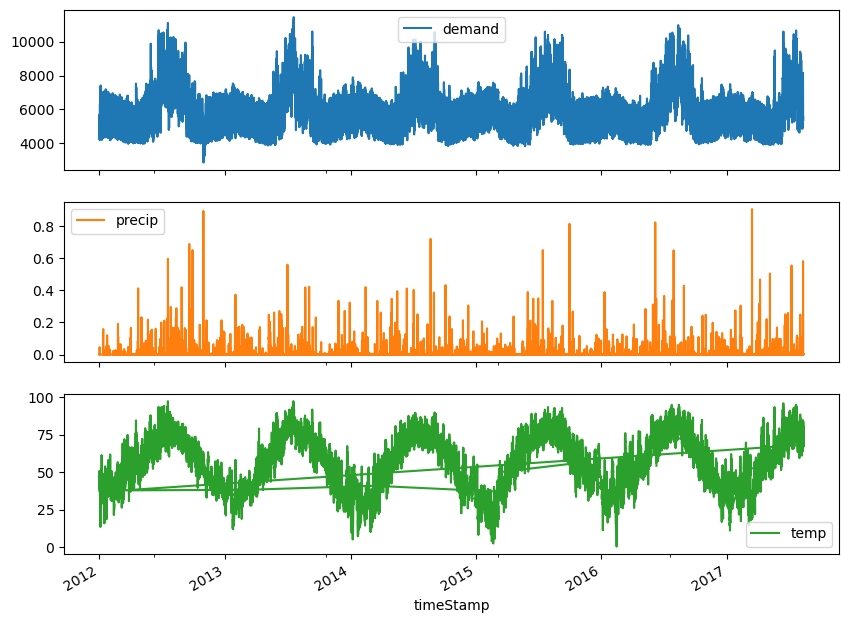

In [8]:
ndf.plot(subplots=True)

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

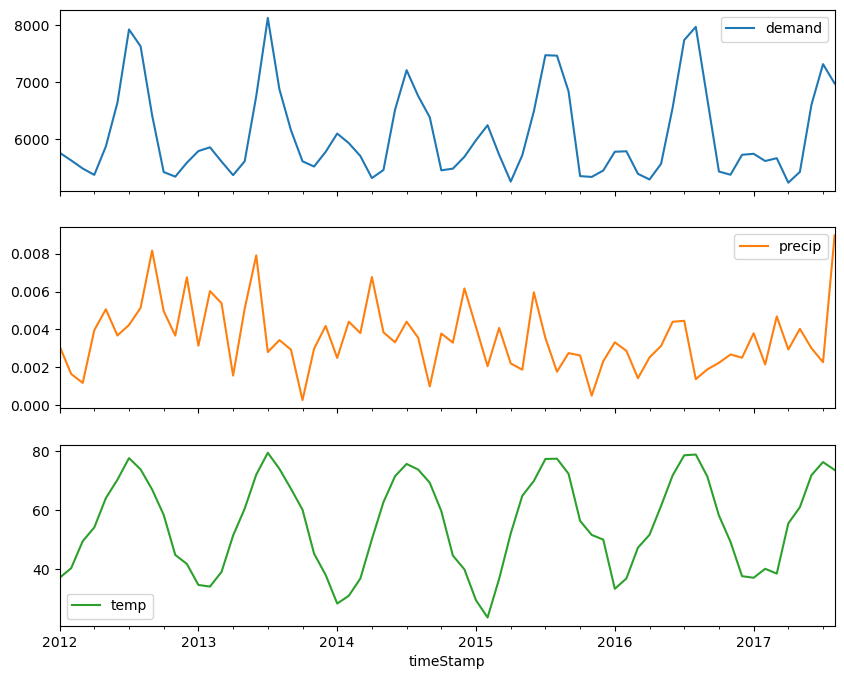

In [9]:
ndf.resample('ME').mean().plot(subplots=True)

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

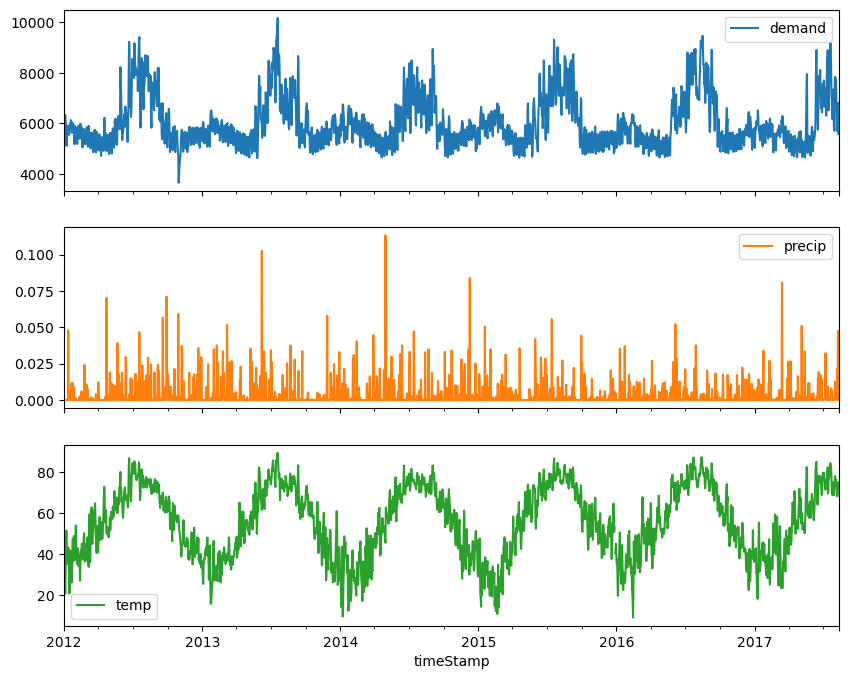

In [10]:
ndf.resample('D').mean().plot(subplots=True)

In [31]:
daily_df = ndf.resample('ME').mean()
daily_df

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.845491,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5232.217107,0.002942,55.621764
2017-05-31,5421.315935,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


Prophet Paper - https://peerj.com/preprints/3190/

y(t)= g(t) + s(t) + h(t) + εt

In [14]:



from prophet import Prophet

In [32]:
daily_df.isnull().sum()

demand    0
precip    0
temp      0
dtype: int64

In [34]:
daily_df

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.845491,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5232.217107,0.002942,55.621764
2017-05-31,5421.315935,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


In [33]:
daily_df1 = daily_df.reset_index()[['timeStamp','demand']].rename({'timeStamp':'ds' ,'demand':'y'}, axis=1)

In [35]:
train = daily_df1[(daily_df1['ds'] >= '2012-01-31') & (daily_df1['ds'] <= '2017-04-30')]
test = daily_df1[(daily_df1['ds'] > '2017-04-30')]

In [36]:
train.shape, train

((64, 2),
            ds            y
 0  2012-01-31  5757.495833
 1  2012-02-29  5622.331609
 2  2012-03-31  5479.845491
 3  2012-04-30  5368.945833
 4  2012-05-31  5867.896102
 ..        ...          ...
 59 2016-12-31  5720.892685
 60 2017-01-31  5738.234350
 61 2017-02-28  5611.792171
 62 2017-03-31  5660.977832
 63 2017-04-30  5232.217107
 
 [64 rows x 2 columns])

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      64 non-null     datetime64[ns]
 1   y       64 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


In [38]:
train.isnull().sum()

ds    0
y     0
dtype: int64

In [39]:
test.isnull().sum()

ds    0
y     0
dtype: int64

In [40]:
test.shape, test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 64 to 67
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4 non-null      datetime64[ns]
 1   y       4 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 96.0 bytes


((4, 2), None)

In [41]:
model = Prophet()

In [26]:
model.changepoint_prior_scale = 0.05  # Lower value (default is 0.05)
model.seasonality_prior_scale = 0.01  # Lower value (default is 0.1)
model.fit(train)

13:46:13 - cmdstanpy - INFO - Chain [1] start processing
13:46:13 - cmdstanpy - INFO - Chain [1] done processing
13:46:13 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
13:46:13 - cmdstanpy - INFO - Chain [1] start processing
13:46:13 - cmdstanpy - INFO - Chain [1] done processing
13:46:13 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\ACER\miniconda3\envs\prophet-env\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=19617 data file=C:\Users\ACER\AppData\Local\Temp\tmp4yc2ifz4\u6ipxpb2.json init=C:\Users\ACER\AppData\Local\Temp\tmp4yc2ifz4\m19p4j6q.json output file=C:\Users\ACER\AppData\Local\Temp\tmp4yc2ifz4\prophet_model60gz7gpr\prophet_model-20240518134613.csv method=optimize algorithm=newton iter=10000' failed: 

In [42]:
model.fit(train, iter=5000)

13:48:51 - cmdstanpy - INFO - Chain [1] start processing
13:48:51 - cmdstanpy - INFO - Chain [1] done processing
13:48:51 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\ACER\miniconda3\envs\prophet-env\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=23335 data file=C:\Users\ACER\AppData\Local\Temp\tmp4yc2ifz4\d6z520wg.json init=C:\Users\ACER\AppData\Local\Temp\tmp4yc2ifz4\g06gwwq3.json output file=C:\Users\ACER\AppData\Local\Temp\tmp4yc2ifz4\prophet_modely86bwy9_\prophet_model-20240518134851.csv method=optimize algorithm=newton iter=5000' failed: 